# Representación de datos

La representación de datos es una tarea importante de los modelos de aprendizaje estadístico. En el aprendizaje de máquina más tradicional, elegir un conjunto de rasgos que represente adecuadamente los datos es de suma importancia.

Los rasgos definen vectores en espacios $d$-dimensionales con los que trabajará la máquina de aprendizaje. Podemos ver el impacto de los datos en el siguiente ejemplo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Representación cartesiana y polar

Podemos generar un conjunto de datos para una clasificación binaria; elegimos generar datos en una 1-esfera que, además, contenga un factor de ruido. En primer lugar, estos datos se visualizan en sus coordenadas cartesianas:

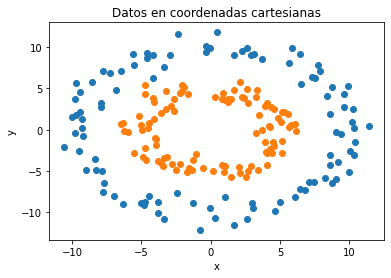

In [2]:
#Generación de datos con ruido blanco
t = np.linspace(0,2*np.pi, 100)
std = 0.9
r1, r2 = 10, 5
x1,y1 = r1*np.cos(t) + np.random.normal(0, std, 100), r1*np.sin(t) + np.random.normal(0, std, 100)
x2,y2 = r2*np.cos(t) + np.random.normal(0, std, 100), r2*np.sin(t) + np.random.normal(0, std, 100)

#Visualización
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.title('Datos en coordenadas cartesianas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

En las coordenadas cartesianas los datos son conjuntos no convexos, por lo que no existe un separador lineal que pueda clasificar correctamente los datos. Sin embargo, si tomamos las coordenadas polares, podemos observar que la disposición de los datos en el espacio de rasgos cambia. 

Recuérdese que obtenemos las coordenadas polares como $x_{polar} = \begin{pmatrix} \rho & \theta \end{pmatrix}$, donde la longitud está determinada como:

$$\rho = \sqrt{x^2 + y^2}$$

Y el ángulo está dado por:

$$\theta = \arctan(\frac{y}{x})$$

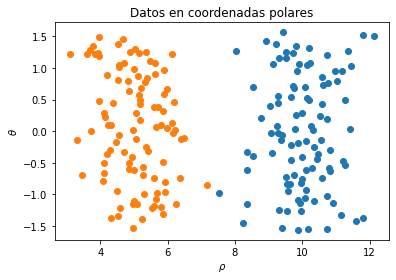

In [3]:
#Funciones para transformar a coordenadas polares
polar_rho = lambda x,y: np.sqrt(x**2 + y**2)
polar_theta = lambda x,y: np.arctan(y/x)

#Coordenadas polares de los datos
rho1, theta1 = polar_rho(x1,y1), polar_theta(x1,y1)
rho2, theta2 = polar_rho(x2,y2), polar_theta(x2,y2)

#Visualización
plt.scatter(rho1,theta1)
plt.scatter(rho2,theta2)
plt.title('Datos en coordenadas polares')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\theta$')
plt.show()

En el feature space de las coordenadas polares los datos sí son línealmente separables, por lo que está forma de codificar los rasgos de los datos parece una mejor opción.

## Codificación de rasgos

La representación de los datos consiste en pasar de los objetos que se quieren procesar con una máquina de aprendizaje a vectores aleatorios. Los <b>rasgos</b> o <b>features</b> son variables aleatorias que representan características relevantes de los obejtos con los que estamos trabajando. Estos rasgos se representan en un vector $d$-dimensional:

$$x^T = \begin{pmatrix} X_1 = x_1 & X_2 = x_2 \cdots & X_d = x_d \end{pmatrix}$$

Cada rasgo $X_i=x_i$ es el valor que toma una variable aleatoria. Se asume que $X_i \perp X_j$ cuando $i \neq j$. Por ejemplo, una variable puede responder al tamaño del objeto, por lo que las features serán números que representen esto. O bien pueden ser variables categóricas, como color, si pertenece o no a un grupo, etc.

La paquetería de <i>sklearn.dataset</i> contiene diferentes datasets con diferentes características:

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print(*data.feature_names, sep='\n')

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


En el caso del dataset sobre cáncer de mama, podemos ver que cuenta con 13 variables (radio medio, textura media, perímetro, área, etc.). Entonces cada dato contará con 13 rasgos o dimensiones:

In [5]:
pd.DataFrame(data=data.data, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Es importante codificar adecuadamente los datos para que los modelos de aprendizaje de máquina puedan trabajar correctamente. Pero en el caso del deep learning, la codificación es aprendida también dentro de la red neuronal, lo que evita dedicar mucho tiempo a la codificación.


## Aprendizaje de representaciones

El aprendizaje de representaciones es una parte del aprendizaje que busca estimar las mejores representaciones de los datos que permitan obtener las salidas esperadas. 

En las redes profundas, este aprendizaje se realiza en las capas ocultas. Por ejemplo, en el caso anterior, podemos crear una red que aprenda una representación de los datos que permita su clasificación:

In [6]:
import torch
import torch.nn as nn

#Definimos una red que pueda aprender una representación de los datos
representation_layer = nn.Sequential(nn.Linear(2, 128), nn.Tanh(), nn.Linear(128,2), nn.Tanh())
output_layer = nn.Sequential(nn.Linear(2,2), nn.Softmax(1))

X = torch.Tensor(list(zip(x1, y1)) + list(zip(x2,y2)))
Y = torch.tensor([0 for i in range(100)] + [1 for i in range(100)])

epochs = 1000
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(list(representation_layer.parameters())+list(output_layer.parameters()), 
                            lr=0.1)
for t in range(epochs):
    y_pred = output_layer(representation_layer(X))
    optimizer.zero_grad()
    loss = criterion(y_pred, Y)
    loss.backward()
    optimizer.step()

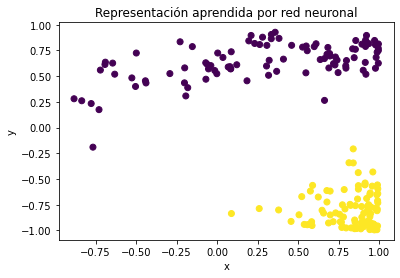

In [7]:
#Aplicamos la representación que aprendemos
representation = representation_layer(X).detach().numpy()

#Visualziación de representación aprendida
plt.scatter(representation[:,0],representation[:,1], c=Y)
plt.title('Representación aprendida por red neuronal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Codificación one-hot y embeddings

Cuando no conocemos los rasgos que peuden caracterizar a nuestros datos es común usar una representación one-hot, que es una representación indexal. 

Por ejemplo, si tenemos 3 objetos que queremos clasificar, podemos asignarle a cada uno un índice de manera arbitraria, $\Omega = \{\omega_1, \omega_2, \omega_3\}$ donde el subíndice indica el índice que corresponde. 

Una representación one-hot crea un vector en base a este índice, de tal forma que los rasgos de cada objeto son:

$$x_i(j) = \begin{cases} 1 & \text{si } i = j \\ 0 & \text{en otro caso}\end{cases}$$

Por ejemplo, el objeto con el índice 2 $\omega_2$ tiene la representación:

$$x^T = \begin{pmatrix} 0 & 1 & 0 \end{pmatrix}$$

Esta representación no es suficiente para realizar una clasificación. Per dentro de una red neuronal se puede aprender un encaje o <b>embedding</b> que consiste en multiplicar una matriz por el one-hot:

$$emb(x) = W \cdot x$$

Por ejemplo, si queremos una representación de dos dimensiones de objeto anterior, tenemos:

$$emb\big(x(2)\big) = \begin{pmatrix} 0.5 & 1 & 0.7 \\ 0.3 & 0.3 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0\end{pmatrix} \begin{pmatrix} 1 \\ 0.3 \end{pmatrix} $$

Se puede notar que este producto equivale a tomar el segundo vector columna de la matriz como representación; es decir, tenemos que $emb(j) = W.T[j]$.

En paqueterías especialzadas en redes neuronales tenemos ya implementadas este tipo de funciones para crear representaciones. Por ejemplo, en pytorch, podemos usar el modulo de Embedding. de la forma:

```python
torch.nn.Embedding(num_índices, dimensión_de_representación)
```

In [8]:
#Definimos la función de representación
emb = nn.Embedding(100, 3) #Trabajará con 100 índices, y creará vectores 3-dimensionales

#Dado un índice regresa un vector de la dimensión definida
print(emb(torch.tensor([1])))

tensor([[ 0.6413, -0.8512,  0.8381]], grad_fn=<EmbeddingBackward>)


In [9]:
#Podemos generar representaciones para varios índices
print(emb(torch.tensor([1, 2, 50, 99])))

tensor([[ 0.6413, -0.8512,  0.8381],
        [ 0.5276,  0.6781,  0.7988],
        [ 0.7977,  0.1561, -0.8541],
        [ 0.0235, -1.8864,  1.3841]], grad_fn=<EmbeddingBackward>)


De esta forma, las redes neuronales y el deep learning evitan la necesidad de definir de manera exhaustiva un conjunto de rasgos que represente a los datos. Sin embargo, también presenta una desventaja, pues las representaciones obtenidas no siempre son fáciles de interpretar.